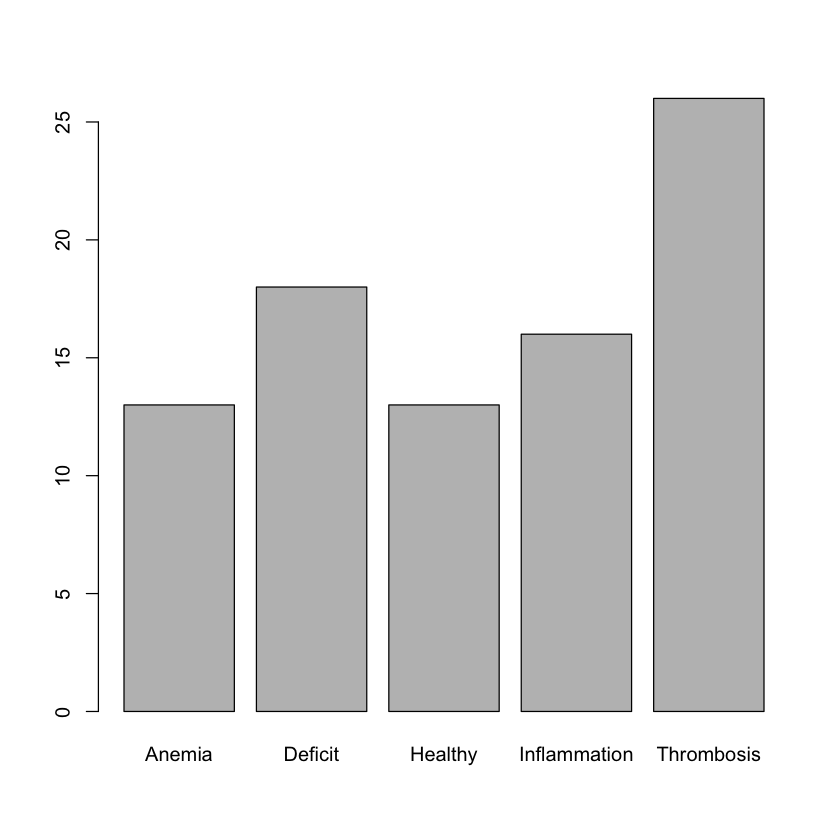

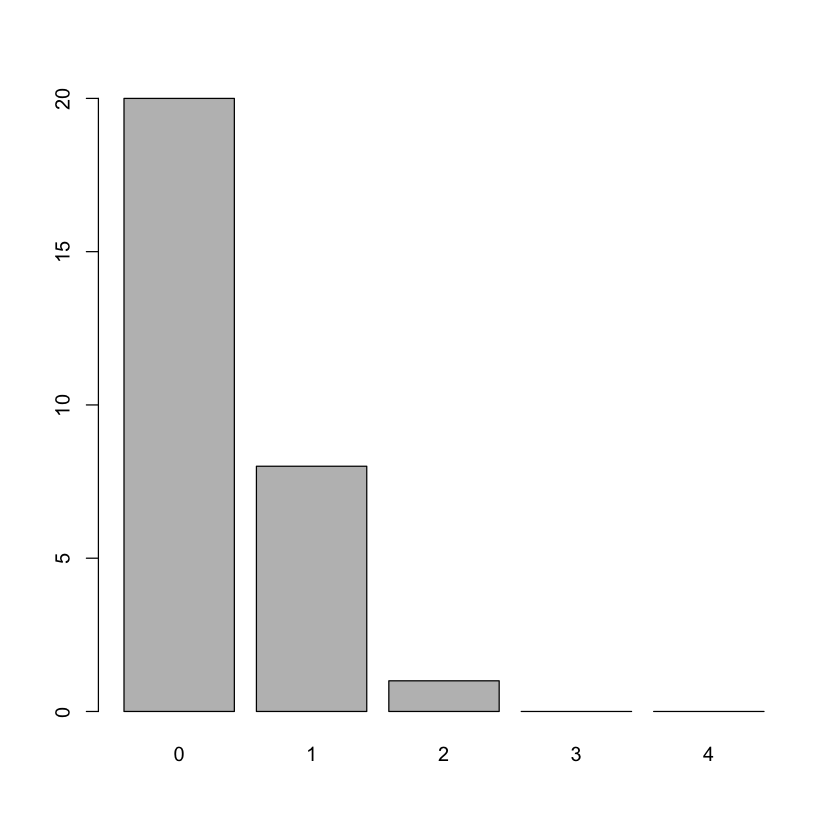

In [63]:
library("openxlsx")
data <- read.xlsx("АнализКровиNA.xlsx", sheet = 10)
impute <- function(data, type) {
  for (i in which(sapply(data, is.numeric))) {
    data[is.na(data[, i]), i] <- type(data[, i],  na.rm = TRUE)
  }
  return(data)}

data_ready <- impute(df, median)
data_ready <- na.omit(data)

norms<- read.xlsx("АнализКровиNA.xlsx", sheet = 3)

#если столбец гендера не на своем месте
gender_index = grep("gender", colnames(data_ready))

#сначала для межучин, потом для женщин
#по результатам выдаем "low", "norm", "high"
for (analisys_name in names(data_ready)[4:10]){
  data_ready[data_ready[gender_index]=="male", analisys_name] =
    cut( data_ready[data_ready[gender_index]=="male", analisys_name],
         breaks=c(0, as.numeric(norms[1,analisys_name]), as.numeric(norms[3,analisys_name]), Inf),
         labels=c("low", "norm","high"))
  data_ready[data_ready[gender_index]=="female", analisys_name] =
    cut( data_ready[data_ready[gender_index]=="female", analisys_name] ,
         breaks=c(0,as.numeric(norms[2,analisys_name]), as.numeric(norms[4,analisys_name]), Inf),
         labels=c("low", "norm", "high"))
  data_ready[, analisys_name] =
    cut( data_ready[, analisys_name], breaks=c(0, 1, 2, Inf), labels=c("low", "norm","high"))
}


#количество нормальных анализов
norms = c()
data_ready$norms <- rowSums(data_ready[-1] == "norm")

#график "ненормальности анализов" в соответствии с типом заболевания
barplot(tapply(data_ready$norms!=7, data_ready$Type, FUN=sum))

#строим для анализов, которые ниже нормы(для анализов выше нормы аналогично)
lows = c()
data_ready$lows <- rowSums(data_ready[-1] == "low")


barplot(tapply(data_ready$Type=="Healthy", data_ready$lows, FUN=sum) )


#запись в файл
write.csv(data_ready, "out_norms.csv", row.names = FALSE)
